<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аннотация:-Восстановление-золота-из-руды" data-toc-modified-id="Аннотация:-Восстановление-золота-из-руды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аннотация: Восстановление золота из руды</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-обзор-исходных-данных" data-toc-modified-id="Импорт-библиотек-и-обзор-исходных-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек и обзор исходных данных</a></span></li><li><span><a href="#Проверка-корректности-расчетов" data-toc-modified-id="Проверка-корректности-расчетов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка корректности расчетов</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-концентрации-металлов" data-toc-modified-id="Исследование-концентрации-металлов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование концентрации металлов</a></span></li><li><span><a href="#Анализ-размеров-гранул-сырья" data-toc-modified-id="Анализ-размеров-гранул-сырья-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации" data-toc-modified-id="Исследование-суммарной-концентрации-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исследование суммарной концентрации</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-машинному-обучению" data-toc-modified-id="Подготовка-к-машинному-обучению-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка к машинному обучению</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-моделей-и-выбор-лучшей" data-toc-modified-id="Проверка-моделей-и-выбор-лучшей-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка моделей и выбор лучшей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

## Аннотация: Восстановление золота из руды

На основе данных с параметрами добычи и очистки металлической руды необходимо подготовить прототип модели машинного обучения, предсказывающей коэффициент восстановления золота из золотосодержащей руды, для оптимизации производства. 

**Цель** проекта: выбрать модель с наилучшими значениями метрик качества: sMAPE и итогового sMAPE. 

**Задачи** проекта:
- подготовка данных для целей машинного обучения;
- проведение исследовательского анализа данных;
- создание и обучение моделей;
- тест моделей и расчет метрик качества.

## Знакомство с данными

### Импорт библиотек и обзор исходных данных

In [1]:
#импортируем библиотеки, которые понадобятся нам в ходе исследования
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
#применяем специальный метод для чтения файлов формата csv
train_data = pd.read_csv ('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv ('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv ('/datasets/gold_recovery_full_new.csv')

Теперь необходимо ознакомиться с имеющимися данными, провести их первичный анализ, чтобы получить общее представление о том, с чем придется работать в ходе исследования, и чтобы выявить проблемы в данных, которые нужно будет устранить на этапе предобработки. 

Так как в этот раз мы будем работать сразу с несколькими исходными таблицами, то удобнее будет автоматизировать процесс получения необходимой информации. Создадим функцию, которая будет выводить:
- общую информацию о таблице;
- 10 первых строк фрейма;
- результаты проверки на наличие в данных явных дубликатов.

In [3]:
def study_of_initial_data(data): #создаем функцию
    print(data.info())
    print()
    display(data.head(10))
    print()
    print(data.duplicated().sum())

In [4]:
#применяем функцию study_of_initial_data() к каждой таблице
study_of_initial_data(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   
5  2016-01-15 05:00:00                     6.482968   
6  2016-01-15 06:00:00                     6.533849   
7  2016-01-15 07:00:00                     6.130823   
8  2016-01-15 08:00:00                     5.834140   
9  2016-01-15 09:00:00                     5.687063   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   
5                    10.049416                      5.480257   
6                    10.058141                      4.569100   
7                     9.935481                      4.389813   
8                    10.071156                      4.876389   
9                     9.980404                      5.282514   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   
5                    41.633678              69.465816             10.182708   
6                    41.995316              69.300835             10.304598   
7                    42.452727              70.230976             10.443288   
8                    43.404078              69.688595             10.420140   
9                    43.235220              70.279619             10.487013   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   
5              0.664118              16.999638              1.918586  ...   
6              0.807342              16.723575              2.058913  ...   
7              0.949346              16.689959              2.143437  ...   
8              1.065453              17.201948              2.209881  ...   
9              1.159805              17.483979              2.209593  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   
5                                 13.938497   
6                                 14.046819   
7                                 13.974691   
8                                 13.964030   
9                                 13.989632   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   
5                                 -500.970168   
6                                 -500.971133   
7                                 -501.819696   
8                             


0


In [5]:
study_of_initial_data(test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   
5  2016-09-01 05:59:59                     168.485085   
6  2016-09-01 06:59:59                     144.133440   
7  2016-09-01 07:59:59                     133.513396   
8  2016-09-01 08:59:59                     133.735356   
9  2016-09-01 09:59:59                     126.961069   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   
5                          8.817007                         7.420000   
6                          7.924610                         7.420000   
7                          8.055252                         6.988000   
8                          7.999618                         6.935000   
9                          8.017856                         7.030000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   
5                        0.791191                             1402.826803   
6                        0.788838                             1398.252401   
7                        0.801871                             1401.669677   
8                        0.789329                             1402.358981   
9                        0.805298                             1400.816120   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   
5                               -499.299521   
6                               -499.748672   
7                               -501.777839   
8                               -499.981597   
9                               -499.014158   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   
5                             1401.511119   
6                             1393.255503   
7                             1400.754446   
8                             1400.985954   
9                             1399.975401   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   
5                               -499.205357   
6                               -499.195380   
7                               -502.514024   
8                               -496.802968   
9                               -499.570552   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                


0


In [6]:
study_of_initial_data(full_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   
5  2016-01-15 05:00:00                     6.482968   
6  2016-01-15 06:00:00                     6.533849   
7  2016-01-15 07:00:00                     6.130823   
8  2016-01-15 08:00:00                     5.834140   
9  2016-01-15 09:00:00                     5.687063   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   
5                    10.049416                      5.480257   
6                    10.058141                      4.569100   
7                     9.935481                      4.389813   
8                    10.071156                      4.876389   
9                     9.980404                      5.282514   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   
5                    41.633678              69.465816             10.182708   
6                    41.995316              69.300835             10.304598   
7                    42.452727              70.230976             10.443288   
8                    43.404078              69.688595             10.420140   
9                    43.235220              70.279619             10.487013   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   
5              0.664118              16.999638              1.918586  ...   
6              0.807342              16.723575              2.058913  ...   
7              0.949346              16.689959              2.143437  ...   
8              1.065453              17.201948              2.209881  ...   
9              1.159805              17.483979              2.209593  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   
5                                 13.938497   
6                                 14.046819   
7                                 13.974691   
8                                 13.964030   
9                                 13.989632   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   
5                                 -500.970168   
6                                 -500.971133   
7                                 -501.819696   
8                             


0


Использование функции позволило нам определить, что во всех трех таблицах столбцы - за исключением столбца даты - содержат данные типа float; имеют большое количество пропусков, не имеют прыгающего регистра в названии и явных дубликатов. 

Кроме того выявлено, что тестовая выборка гораздо меньше обучающей (53 столбца против 87 и 5290 строк против 14149). 

Даты в тестовой выборке оканчиваются на последнюю минуту часа, в обучающей - на первую. 

### Проверка корректности расчетов

Далее проверим корректность рассчета эффективности обогащения. Формула расчета была дана нам в теории к проекту, на ее основе создадим функцию и применим ее к обучающей выборке.

In [7]:
#создаем функцию для рассчета эффективности обогащения
def recovery(c, f, t): 
    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    recovery[recovery < 0] = np.nan #предотвратим появление в новом столбце некорректных данных
    recovery[recovery > 100] = np.nan
    return recovery

#применяем функцию к обучающей выборке, создавая новый столбец с результатами
train_data['rougher.calculation.recovery'] = recovery(train_data['rougher.output.concentrate_au'], 
                                                    train_data['rougher.input.feed_au'], train_data['rougher.output.tail_au'])

Перед тем, как вычислить МАЕ, сравним визуально значения, полученные после использования функции, и значения, сохраненные в столбце rougher.output.recovery, выведя их на экран.

In [8]:
display (train_data[['rougher.output.recovery', 'rougher.calculation.recovery']].head(10))

rougher.output.recovery  rougher.calculation.recovery
0                87.107763                     87.107763
1                86.843261                     86.843261
2                86.842308                     86.842308
3                87.226430                     87.226430
4                86.688794                     86.688794
5                88.156912                     88.156912
6                88.168065                     88.168065
7                87.668336                     87.668336
8                87.035862                     87.035862
9                87.650868                     87.650868

Значения столбцов совпадают, что свидетельствует о корректности рассчетов. Теперь проверим, не появились ли в рассчитанном функцией столбце некорректные значения, замененные на nan.

In [9]:
print(train_data['rougher.calculation.recovery'].isna().any())

False


Таких значений нет, значит, можем переходить к рассчету МАЕ:

In [10]:
print(mean_absolute_error(train_data['rougher.output.recovery'], train_data['rougher.calculation.recovery']))

9.73512347450521e-15


МАЕ имеет очень низкое значение. Значит, можем сделать вывод, что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

Посмотрим на столбцы, которые не попали в тестовую выборку. Отделим их от общей массы данных и выведем на экран в отсортированном списке. 

In [11]:
full_columns = list(full_data.columns)
test_columns = list(test_data.columns)

print(sorted(list(set(full_columns) - set (test_columns))))

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

В основном данные столбцы содержат выходные значения концентратов и отвальных хвостов различных видов сырья после тех или иных этапов технологического процесса. Все они относятся к типу output - параметры продукта. 

К данному типу относятся и показатели эффективности обогащения, т.е целевые признаки, также невошедшие в тестовую выборку.

Кроме того встречаются столбцы с расчетными характеристиками (тип calculation), но их очень мало: всего 4 столбца.

### Вывод

Знакомство с исходными данными позволило определить следующее:
- явных дубликатов не обнаружено;
- эффективность обогащения рассчитана правильно;
- в данных имеется большое количество пропусков, требующих обработки;
- тестовая выборка содержит меньший объем данных по сравнению с обучающей (в ней нет целевых признаков и параметров, рассчитываемых позднее).

Устраним выявленые проблемы на этапе предобработки данных.

## Предобработка данных

Начнем предобработку с того, что оставим в обучающей выборке только признаки, имеющиеся и в тестовой, т.к. только они будут доступны для модели в продакшене. Выполним эти шаги последовательно, чтобы уменьшить их количество.

In [12]:
#сократим обучающую выборку
train_data = train_data[test_data.columns] 

#проверим результат
print(train_data.columns)

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Переходим к обработке пропусков. Посмотрим, какую долю от данных каждой таблицы они занимают. Столбцов много, а нас в большей мере интересуют те, в которых доля пропусков наибольшая. Поэтому отсортируем столбцы соответсвующим образом и выведем на экран топ-5.

In [13]:
print((train_data.isna().sum().sort_values(ascending=False)/train_data.shape[0]*100).head(5))
print()
print((test_data.isna().sum().sort_values(ascending=False)/test_data.shape[0]*100).head(5))

rougher.state.floatbank10_e_air             3.081490
rougher.input.floatbank11_xanthate          3.024949
secondary_cleaner.state.floatbank2_a_air    1.533677
rougher.input.feed_size                     1.017740
rougher.input.feed_pb                       0.706764
dtype: float64

rougher.input.floatbank11_xanthate          0.472590
rougher.input.feed_sol                      0.396975
secondary_cleaner.state.floatbank3_a_air    0.170132
rougher.input.floatbank11_sulfate           0.151229
primary_cleaner.input.depressant            0.094518
dtype: float64


В тестовой выборке доли пропусков составляют менее 1%, поэтому строки с пропущенными значениями можно удалить. 

А вот в обучающей выборке ситуация иная: самая большая доля пропусков составляет 3%, что довольно много. Здесь заменим пропущенные значения на медианное.

In [14]:
#заменяем пропуски в обучающей выборке на медианное значение
train_data = train_data.fillna(train_data.median())  

#удаляем строки с пропущенными значениями из тестовой выборки
test_data = test_data.dropna() 

#проверяем результаты обработки пропусков
print((train_data.isna().sum().sort_values(ascending=False)/train_data.shape[0]*100).head(5))
print()
print((test_data.isna().sum().sort_values(ascending=False)/test_data.shape[0]*100).head(5))

date                                 0.0
rougher.state.floatbank10_c_air      0.0
rougher.state.floatbank10_d_air      0.0
rougher.state.floatbank10_d_level    0.0
rougher.state.floatbank10_e_air      0.0
dtype: float64

date                                 0.0
rougher.state.floatbank10_c_air      0.0
rougher.state.floatbank10_d_air      0.0
rougher.state.floatbank10_d_level    0.0
rougher.state.floatbank10_e_air      0.0
dtype: float64


### Вывод

На этапе предобработки данных мы сократили обучающую выборку, удалили из выборок столбец с датой и временем и обработали имеющиеся в данных пропуски. 

На следующем этапе произведем исследовательский анализ данных.

## Анализ данных

### Исследование концентрации металлов

Изучим, как меняется концентрация золота, серебра и свинца на различных этапах очистки. Для этого построим графики с использованием библиотеки seaborn. 

Строить их мы будем на основе данных из полного фрейма, которые не подвергались предобработке, поэтому в них могут встречаться пропуски, которые помешают построению графиков. Проверим это:

In [15]:
print((full_data[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
                 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
                ].isna().sum().sort_values(ascending=False)/test_data.shape[0]*100))

primary_cleaner.output.concentrate_pb    2.218397
final.output.concentrate_ag              0.019124
final.output.concentrate_pb              0.019124
rougher.output.concentrate_au            0.000000
primary_cleaner.output.concentrate_au    0.000000
final.output.concentrate_au              0.000000
rougher.output.concentrate_ag            0.000000
primary_cleaner.output.concentrate_ag    0.000000
rougher.output.concentrate_pb            0.000000
dtype: float64


Действительно, в данных по серебру и свинцу присутствует малое количество пропусков. Удалим соответствующие строки, т.к. это позволит построить графики и при этом не исказить их результаты.

In [16]:
data_for_analysis = full_data[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                    'final.output.concentrate_au','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag', 
                    'final.output.concentrate_ag','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
                    'final.output.concentrate_pb']].dropna() #удаляем строки

print((data_for_analysis.isna().sum().sort_values(ascending=False)/test_data.shape[0]*100)) #проверяем результат

rougher.output.concentrate_au            0.0
primary_cleaner.output.concentrate_au    0.0
final.output.concentrate_au              0.0
rougher.output.concentrate_ag            0.0
primary_cleaner.output.concentrate_ag    0.0
final.output.concentrate_ag              0.0
rougher.output.concentrate_pb            0.0
primary_cleaner.output.concentrate_pb    0.0
final.output.concentrate_pb              0.0
dtype: float64


Данные подготовлены, теперь можно строить графики. Автоматизируем этот процесс, т.к. нам нужно исследовать динамику концентрации трех металлов. Создадим функцию, в которой зададим единые параметры для трех графиков.

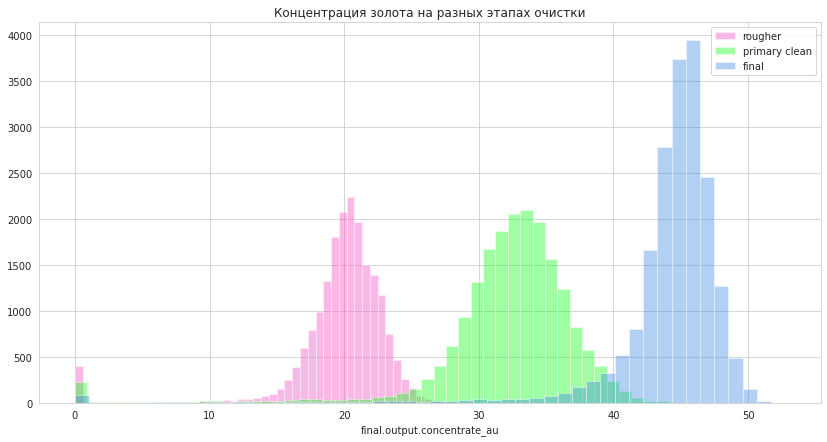

In [17]:
def concentrate_comparison(rougher, prim_clean, final, title): #создаем функцию
    plt.figure(figsize=(14, 7))
    sns.set_style('whitegrid')
    sns.distplot(data_for_analysis[rougher], color='#f04fc2', kde=False)
    sns.distplot(data_for_analysis[prim_clean], color='#0fff17', kde=False)
    sns.distplot(data_for_analysis[final], color='#3c8be5', kde=False)
    plt.title(title)
    plt.legend(['rougher', 'primary clean', 'final'])
    plt.show()
    
warnings.filterwarnings('ignore')
concentrate_comparison('rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                       'final.output.concentrate_au', 'Концентрация золота на разных этапах очистки') #применяем ее

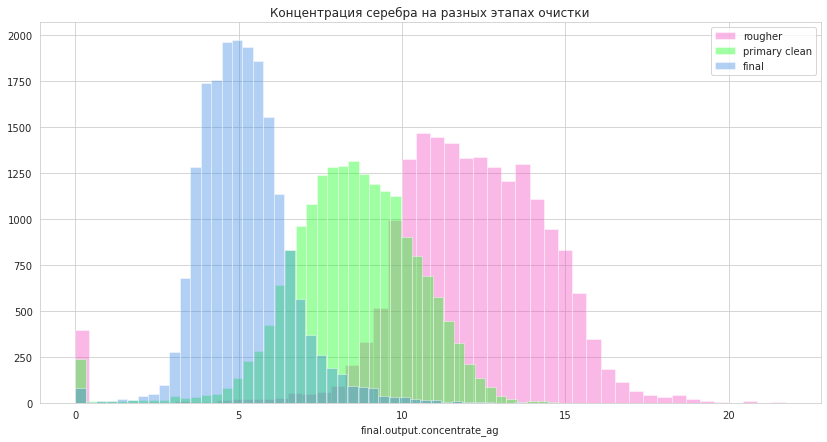

In [18]:
concentrate_comparison('rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
                       'final.output.concentrate_ag', 'Концентрация серебра на разных этапах очистки') 

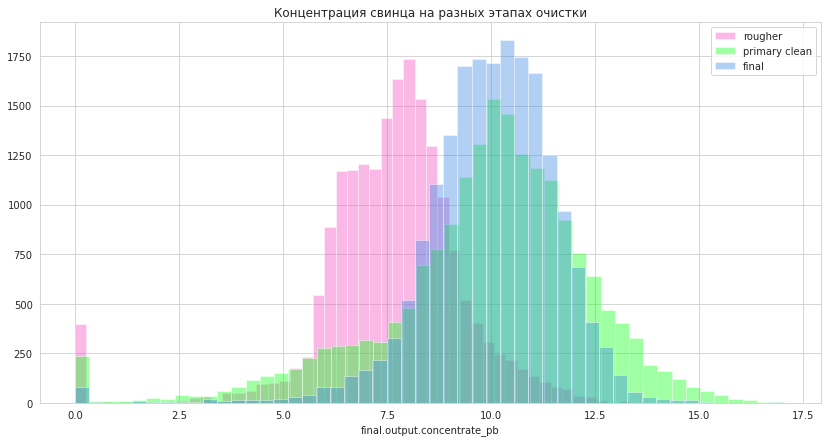

In [19]:
concentrate_comparison('rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
                       'final.output.concentrate_pb', 'Концентрация свинца на разных этапах очистки') 

Согласно построенным графикам, концентрация золота увеличивается от этапа к этапу и достигает максимума на финальном шаге очистки. Концентрация серебра ведет себя ровно наоборот и к финальному этапу достигает минимальных значений. Что касается свинца, то после черновой очистки его концентрация незначительно увеличивается и далее остается примерно на том же уровне.

Кроме того графики позволили выявить наличие в данных аномальных значений, которые не учитывались при анализе.

Переходим к анализу размеров гранул сырья.

### Анализ размеров гранул сырья

Проверим, сильно ли различаются между собой распределения размеров гранул сырья на обучающей и тестовой выборках - это может негативно повлиять на будущую оценку моделей машинного обучения.

Построим график:

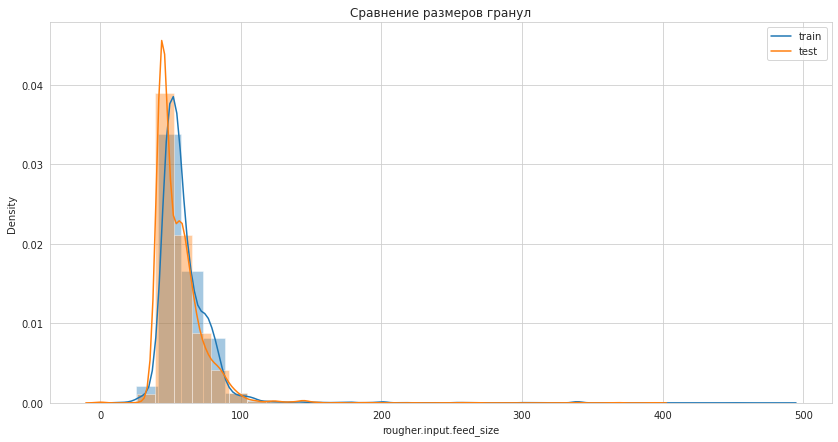

In [20]:
plt.figure(figsize=(14, 7))
sns.distplot(train_data['rougher.input.feed_size'], bins=30)
sns.distplot(test_data['rougher.input.feed_size'], bins=30)
plt.legend(['train', 'test'])
plt.title('Сравнение размеров гранул')
plt.show()

Распределения размеров на тестовой и обучающей выборке похожи, различаются несильно, поэтому вероятность негативного влияния на оценку моделей крайне низкая.

Наконец исследуем суммарную концентрацию всех веществ на разных стадиях.

### Исследование суммарной концентрации 

На финальном этапе анализа данных исследуем суммарную концентрацию всех веществ в сырье, в черновом и финальном концентратах. Затем построим график для визуального отображения полученных результатов.

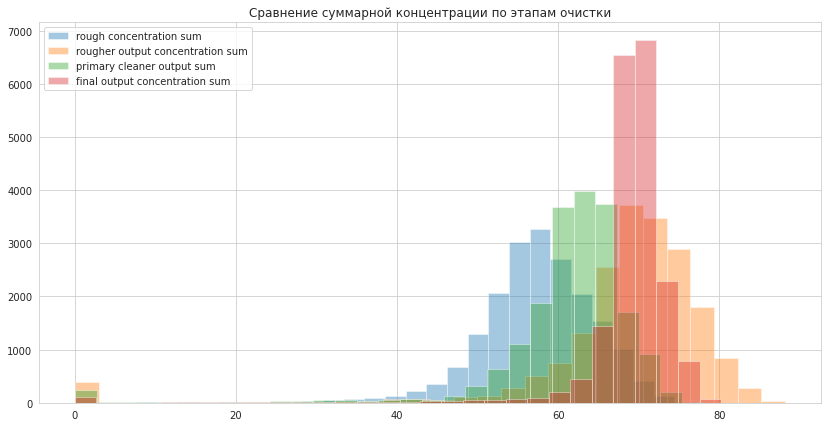

In [21]:
rough_sum = full_data['rougher.input.feed_au'] + full_data['rougher.input.feed_ag'] + full_data[
            'rougher.input.feed_pb'] + full_data['rougher.input.feed_sol']

rougher_output_sum = full_data['rougher.output.concentrate_au'] + full_data['rougher.output.concentrate_ag'] + full_data[
                     'rougher.output.concentrate_pb'] + full_data['rougher.output.concentrate_sol']

primary_cleaner_output_sum = full_data['primary_cleaner.output.concentrate_au'] + full_data[
                             'primary_cleaner.output.concentrate_ag'] + full_data['primary_cleaner.output.concentrate_pb'] + full_data[
                             'primary_cleaner.output.concentrate_sol']

final_output_sum = full_data['final.output.concentrate_au'] + full_data['final.output.concentrate_ag'] + full_data[
                     'final.output.concentrate_pb'] + full_data['final.output.concentrate_sol']

#строим график по результатам суммирования
plt.figure(figsize=(14, 7))
sns.distplot(rough_sum, bins=30, kde=False)
sns.distplot(rougher_output_sum, bins=30, kde=False)
sns.distplot(primary_cleaner_output_sum, bins=30, kde=False)
sns.distplot(final_output_sum, bins=30, kde=False)
plt.legend(['rough concentration sum', 'rougher output concentration sum',
     'primary cleaner output sum', 'final output concentration sum'])
plt.title('Сравнение суммарной концентрации по этапам очистки')
plt.show()

Согласно графику, суммарная концентрация веществ растет от этапа к этапу. Также можно заметить, что в данных присутствует много аномальных, нулевых значений. Предположу, что это связано с тем, что в определенной доле исходного сырья попадается так называемая пустая порода, не содержащая в себе металлов. 

Удалим строки с нулевыми значениями из обучающей и тестовой выборок через функцию.

In [22]:
def drop_zeros(data): #создаем функцию
    df = data.drop(rough_sum[rough_sum == 0].index, errors='ignore')
    df = data.drop(rougher_output_sum[rougher_output_sum == 0].index, errors='ignore')
    df = data.drop(primary_cleaner_output_sum[primary_cleaner_output_sum == 0].index, errors='ignore')
    df = data.drop(final_output_sum[final_output_sum == 0].index, errors='ignore')
    return df

#применяем функцию к обучающей выборке
train_data = drop_zeros(train_data)

#применяем функцию к тестовой выборке
test_data = drop_zeros(test_data)

### Вывод

Проведенный анализ данных позволил сделать следующие выводы:
- по мере продвижения по этапам очистки концентрация золота увеличивается, серебра - снижается, свинца - остается примерно на одном уровне;
- значительных расхождений в распределениях размеров гранул сырья на обучающей и тестовой выборках не обнаружено;
- суммарная концентрация веществ в сырье растет по мере прохождения этапов очистки.

Следующий шаг будет посвящен моделям машинного обучения и кросс-валидации.

## Обучение и тестирование моделей

### Подготовка к машинному обучению

Перед тем, как приступить к обучению моделей, нам нужно выполнить еще несколько важных пунктов. Для начала - создать функции для вычисления метрик качества: sMAPE и итогового sMAPE. Формулы для вычисления, на основе которых и будут создаваться функции, даны нам в теории к проекту.

In [23]:
#создаем функции для вычисления метрик качества
def sMAPE (y_true, y_predict):
    smape = (np.mean((abs(y_true - y_predict))/((abs(y_true) + abs(y_predict)) / 2))) * 100
    return smape

def final_sMAPE (rougher, final):
    final_smape = 0.25 * rougher + 0.75 * final
    return print(final_smape)

На этапе предобработки данных мы работали с имеющимися у нас обучающей и тестовой выборками, в результате чего в обеих не оказалось целевых признаков: эффективности обогащения сырья после флотации и после полного цикла очистки. Добавим их в отдельные переменные, вычленив из исходной таблицы с полным набором данных. 

Чтобы данные отобрались верно, установим в каждом датасете дату в качестве индекса. Нужно также учесть и возможное наличие в данных пропусков, строки с которыми мы удалим.

In [24]:
#устанавливаем дату в качестве индекса
full_data = full_data.reset_index().set_index('date')
train_data = train_data.reset_index().set_index('date')
test_data = test_data.reset_index().set_index('date')

In [25]:
#вычленяем первый целевой признак для обеих выборок
target_train_rougher = full_data['rougher.output.recovery'].dropna()[train_data.index]
target_test_rougher = full_data['rougher.output.recovery'].dropna()[test_data.index]

#повторяем процедуру для второго признака
target_train_final = full_data['final.output.recovery'].dropna()[train_data.index]
target_test_final = full_data['final.output.recovery'].dropna()[test_data.index]

На этом завершим подготовку и перейдем непосредственно к процессу обучения моделей.

In [26]:
target_test_final, target_test_rougher

(date
 2016-09-01 00:59:59    70.273583
 2016-09-01 01:59:59    68.910432
 2016-09-01 02:59:59    68.143213
 2016-09-01 03:59:59    67.776393
 2016-09-01 04:59:59    61.467078
                          ...    
 2017-12-31 19:59:59    68.919891
 2017-12-31 20:59:59    68.440582
 2017-12-31 21:59:59    67.092759
 2017-12-31 22:59:59    68.061186
 2017-12-31 23:59:59    71.699976
 Name: final.output.recovery, Length: 5207, dtype: float64,
 date
 2016-09-01 00:59:59    89.993421
 2016-09-01 01:59:59    88.089657
 2016-09-01 02:59:59    88.412756
 2016-09-01 03:59:59    87.360133
 2016-09-01 04:59:59    83.236367
                          ...    
 2017-12-31 19:59:59    95.172585
 2017-12-31 20:59:59    94.575036
 2017-12-31 21:59:59    93.018138
 2017-12-31 22:59:59    92.599042
 2017-12-31 23:59:59    91.177695
 Name: rougher.output.recovery, Length: 5207, dtype: float64)

### Обучение моделей

Обучим модели дерева решений и случайного леса и оценим их качество, используя созданные на предыдущем шаге функции. Для этих целей создадим еще одну функцию, включив в нее GridSearchCV – инструмент для автоматического поиска наилучших параметров моделей путем обычного перебора.

In [397]:
#создаем функцию для обучения модели и подбора наилучших параметров
def fit_and_check(model, parametrs, train_data, target_train):
    my_scorer = make_scorer(sMAPE, greater_is_better=False)
    clf = GridSearchCV(model, parametrs, scoring=my_scorer, cv=5)
    clf.fit(train_data, target_train)
    return clf.best_params_, -1*clf.best_score_

#задаем для обеих моделей наборы параметров, среди которых будет производиться поиск
params_tree = {'max_depth': range(1, 21), 'random_state': [12345]}
params_forest = {'n_estimators': range(11, 31, 10), 'max_depth': range(1, 21), 'random_state': [12345]}

In [398]:
#применяем функцию к моделям, постфлотационным и финальным данным
print(fit_and_check (DecisionTreeRegressor(), params_tree, train_data, target_train_rougher))
print()
print(fit_and_check (RandomForestRegressor(), params_forest, train_data, target_train_rougher))
print()
print(fit_and_check (DecisionTreeRegressor(), params_tree, train_data, target_train_final))
print()
print(fit_and_check (RandomForestRegressor(), params_forest, train_data, target_train_final))

({'max_depth': 4, 'random_state': 12345}, 10.783306211889926)

({'max_depth': 4, 'n_estimators': 11, 'random_state': 12345}, 10.366131131291294)

({'max_depth': 4, 'random_state': 12345}, 10.23911153314299)

({'max_depth': 4, 'n_estimators': 21, 'random_state': 12345}, 9.586087472355599)


Параметры подобраны, а вычисленные значения sMAPE мы теперь можем подставить в формулу нахождения итоговой метрики:

In [399]:
print('Итоговое sMAPE для дерева решений:') 
final_sMAPE(10.783306211889926, 10.23911153314299)
print()
print('Итоговое sMAPE для случайного леса:') 
final_sMAPE(10.366131131291294, 9.586087472355599)

Итоговое sMAPE для дерева решений:
10.375160202829726

Итоговое sMAPE для случайного леса:
9.781098387089521


Данные получены, случайный лес показал лучший результат, чем дерево решений: его итоговое SMAPE ниже на 594 тысячные (0.594). 
Теперь модели необходимо проверить на адекватность. Для этого вычислим метрики для константной модели и сравним с результатами дерева и леса.

In [400]:
#вычисляем sMAPE(rougher) для константной модели
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(train_data, target_train_rougher)
predictions_dummy_clf = dummy_clf.predict(test_data)
smape_dummy_rougher = sMAPE(target_test_rougher, predictions_dummy_clf)
print('sMAPE(rougher) для константной модели:', smape_dummy_rougher.round(3))

#вычисляем sMAPE(final) для константной модели
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(train_data, target_train_final)
predictions_dummy_clf = dummy_clf.predict(test_data)
smape_dummy_final = sMAPE(target_test_final, predictions_dummy_clf)
print('sMAPE(final) для константной модели:', smape_dummy_final.round(3))

#вычисляем итоговое sMAPE для константной модели
print('Итоговое sMAPE для константной модели:')
final_sMAPE(smape_dummy_rougher, smape_dummy_final)

sMAPE(rougher) для константной модели: 8.464
sMAPE(final) для константной модели: 9.248
Итоговое sMAPE для константной модели:
9.052156878774587


Результаты обученных нами моделей решающего дерева и случайного леса уступают значениям метрик константной модели. Однако тест на адекватность они прошли, следовательно, можно переходить к проверке их на тестовой выборке и выбору лучшей модели.

### Проверка моделей и выбор лучшей

Из предыдущего этапа мы знаем наилучшие параметры для каждой модели. Применим их для проверки работы моделей на тестовой выборке и вычислим новые значения метрик качества.

In [401]:
model_tree_rougher = DecisionTreeRegressor(max_depth = 4, random_state=12345)
model_tree_rougher.fit(train_data, target_train_rougher)
predictions_tree_rougher = model_tree_rougher.predict(test_data)
smape_tree_rougher = sMAPE(target_test_rougher, predictions_tree_rougher)
print('sMAPE(rougher) для дерева решений:', smape_tree_rougher.round(3))

model_tree_final = DecisionTreeRegressor(max_depth = 4, random_state=12345)
model_tree_final.fit(train_data, target_train_final)
predictions_tree_final = model_tree_final.predict(test_data)
smape_tree_final = sMAPE(target_test_final, predictions_tree_final)
print('sMAPE(final) для дерева решений:', smape_tree_final.round(3))

model_forest_rougher = RandomForestRegressor(max_depth = 4, n_estimators = 11, random_state=12345)
model_forest_rougher.fit(train_data, target_train_rougher)
predictions_forest_rougher = model_forest_rougher.predict(test_data)
smape_forest_rougher = sMAPE(target_test_rougher, predictions_forest_rougher)
print('sMAPE(rougher) для случайного леса:', smape_forest_rougher.round(3))

model_forest_final = RandomForestRegressor(max_depth = 4, n_estimators = 21, random_state=12345)
model_forest_final.fit(train_data, target_train_final)
predictions_forest_final = model_forest_final.predict(test_data)
smape_forest_final = sMAPE(target_test_final, predictions_forest_final)
print('sMAPE(final) для случайного леса:', smape_forest_final.round(3))

print()

print('Итоговое sMAPE для дерева решений:') 
final_sMAPE(smape_tree_rougher, smape_tree_final)
print('Итоговое sMAPE для случайного леса:')
final_sMAPE(smape_forest_rougher, smape_forest_final)

sMAPE(rougher) для дерева решений: 11.319
sMAPE(final) для дерева решений: 9.775
sMAPE(rougher) для случайного леса: 11.125
sMAPE(final) для случайного леса: 9.628

Итоговое sMAPE для дерева решений:
10.160939109907
Итоговое sMAPE для случайного леса:
10.002137259667434


На тестовой выборке лучший результат снова показала модель случайного леса, однако на этот раз различия в значениях метрик гораздо меньше: 159 тысячных (0.159). 
Теперь сравним значение метрик с константной моделью.

In [402]:
#вычисляем sMAPE(rougher) для константной модели
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(train_data, target_train_rougher)
predictions_dummy_clf = dummy_clf.predict(test_data)
smape_dummy_rougher = sMAPE(target_test_rougher, predictions_dummy_clf)
print('sMAPE(rougher) для константной модели:', smape_dummy_rougher.round(3))

#вычисляем sMAPE(final) для константной модели
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(train_data, target_train_final)
predictions_dummy_clf = dummy_clf.predict(test_data)
smape_dummy_final = sMAPE(target_test_final, predictions_dummy_clf)
print('sMAPE(final) для константной модели:', smape_dummy_final.round(3))

#вычисляем итоговое sMAPE для константной модели
print('Итоговое sMAPE для константной модели:')
final_sMAPE(smape_dummy_rougher, smape_dummy_final)

sMAPE(rougher) для константной модели: 8.464
sMAPE(final) для константной модели: 9.248
Итоговое sMAPE для константной модели:
9.052156878774587


Результаты константной модели все еще лучше, чем выбранных нами. Однако итоговое sMAPE случайного леса более приближено к sMAPE константной модели. Следовательно, именно эта модель и будет признана лучшей.

### Вывод

На данном этапе мы произвели подбор наилучших параметров для моделей случайного леса и дерева решений, используя инструмент GridSearchCV, обучили модели, проверили их на адекватность и протестировали. Данные шаги позволили нам выбрать наилучшие модели для двух целевых признаков: для эффективности обогащения сырья после флотации модель случайного леса с параметрами max_depth = 4, n_estimators = 11 и для эффективности обогащения сырья после полного цикла очистки также случайные лес, но с параметрами max_depth = 4, n_estimators = 21.

## Итоговые выводы

В ходе проекта мы изучили данные о добыче и очистке металлической руды и обучили несколько моделей (дерево решений и случайный лес) с целью создания прототипа модели для предсказания коэффициента восстановления золота из золотосодержащей руды. Исследовательский анализ данных позволил прийти к следующим выводам: 
- по мере прохождения процесса очистки суммарная концентрация веществ в сырье растет, при этом концентрация золота растет, серебра снижается, свинца остается практически неизменной;
- распределения размеров гранул сырья на обучающей и тестовой выборках схожи и не оказывают негативного воздействия на результаты обучения и работы моделей.


По итогам выполнения проекта искомой моделью стала:
- для эффективности обогащения сырья после флотации - модель случайного леса с параметрами max_depth = 4, n_estimators = 11 и sMAPE = 11.125;
- для эффективности обогащения сырья после полного цикла очистки модель случайного леса с параметрами  max_depth = 4, n_estimators = 21 и sMAPE = 9.628. 


Итоговое sMAPE составило 10.002.